In [1]:
import numpy as np
from dbesg import SmithWilson, NelsonSiegel

In [2]:
SmithWilson?

Init signature: SmithWilson(alpha, ufr)
Docstring:     
Description
-----------
Smith-Wilson Method를 이용하여 보간ㆍ보외 수행

Example
-------
    >>> maturity = np.array([1, 3, 5, 10, 20, 30])
    >>> rate = np.array([0.01301, 0.01325, 0.01415, 0.01600, 0.01625, 0.01604])
    >>> alpha, ufr = 0.1, 0.052
    >>> sw = SmithWilson(alpha, ufr)
    >>> sw.set_params(maturity, rate)
    >>> t = np.linspace(0, 100, 1201)
    >>> spot = sw.spot_rate(t)
    >>> df = sw.discount_factor(t)
    >>> forward = sw.forward_rate(t, 1/12)
File:           c:\users\11700205\documents\dev\2. esg\2020.07 esg 개발\dbesg\yieldcurve.py
Type:           type
Subclasses:     


In [3]:
maturity = np.array([1, 3, 5, 10, 20, 30])
rate = np.array([0.01301, 0.01325, 0.01415, 0.01600, 0.01625, 0.01604])
alpha, ufr = 0.1, 0.052
sw = SmithWilson(alpha, ufr)
sw.set_params(maturity, rate)
t = np.linspace(0, 100, 1201)
spot = sw.spot_rate(t)
forward = sw.forward_rate(t, 1)

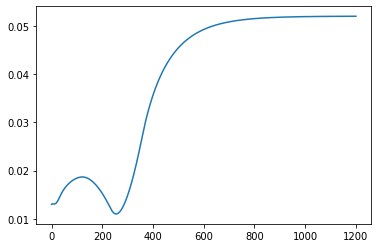

In [4]:
import matplotlib.pyplot as plt
plt.plot(forward)
plt.show()